<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [2]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 42.8 MB/s 
     |████████████████████████████████| 11.2 MB 60.9 MB/s 
     |████████████████████████████████| 718 kB 13.3 MB/s 
     |████████████████████████████████| 9.8 MB 9.8 MB/s 
     |████████████████████████████████| 900 kB 60.7 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640973 sha256=07d99b0748d26840fcd581bf0c24588436571f2cff268f6a18b6cbfdfc847a95
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 18.7 MB/s 
     |████████████████████████████████| 3.3 MB 64.7

In [14]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datetime import datetime

## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [58]:
# скачаем данные
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17qugOMRQkhfmGNGNMOkxMH_kbXtIZUPS' -O daily.csv 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_wZI3AKvm6_eoNlTxTPwjLY8sKFaDf7j' -O monthly.csv 

--2022-04-21 16:08:09--  https://docs.google.com/uc?export=download&id=17qugOMRQkhfmGNGNMOkxMH_kbXtIZUPS
Resolving docs.google.com (docs.google.com)... 172.217.194.101, 172.217.194.102, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-6s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lq20mlhiphaed18qjksbok8i2kout1p2/1650557250000/17587383742069257366/*/17qugOMRQkhfmGNGNMOkxMH_kbXtIZUPS?e=download [following]
--2022-04-21 16:08:11--  https://doc-0g-6s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lq20mlhiphaed18qjksbok8i2kout1p2/1650557250000/17587383742069257366/*/17qugOMRQkhfmGNGNMOkxMH_kbXtIZUPS?e=download
Resolving doc-0g-6s-docs.googleusercontent.com (doc-0g-6s-docs.googleusercontent.com)... 74.125.200.132, 2404:6800:4003:c00::84
Connecting to doc-0g-6s-docs.googleusercontent.com (doc-0g-6s-docs.

In [102]:
def process_montly_dataset(dataset):
    dataset.drop(['D-J-F','M-A-M','J-J-A','S-O-N', 'metANN'], axis=1, inplace=True)
    for i in dataset.columns:
        dataset[i] = dataset[i].replace(999.90, np.NaN)
        dataset[i] = dataset[i].fillna(dataset[i].rolling(12,1).mean())

    dataset.columns = ['year', ] + [f'{i:02d}' for i in range(1, 13)]
    dataset = pd.melt(
        dataset,
        id_vars=['year'],
        value_vars=dataset.columns[1:],
        var_name='month',
        value_name='value'
    )
    dataset['date'] = pd.to_datetime(dataset['year'].astype(str) + '-' + dataset['month'].astype(str) + '-01', format='%Y-%m-%d')
    dataset.drop(['year', 'month'], axis=1, inplace=True)
    dataset.sort_values(by='date',inplace=True)
    dataset = dataset[dataset.date > datetime.strptime('1946-01-01', '%Y-%m-%d')]
    return dataset

def process_daily_dataset(dataset):
    dataset = dataset.loc[:, ['date', 'mosquito_Indicator']]
    dataset.loc[:, 'date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
    dataset.loc[:, 'value'] = dataset['mosquito_Indicator']
    dataset.drop(['mosquito_Indicator', ], axis=1, inplace=True)
    dataset.sort_values(by='date',inplace=True)
    return dataset

In [104]:
# считаем файлы
ts1 = process_montly_dataset(pd.read_csv("monthly.csv"))
ts2 = process_daily_dataset(pd.read_csv("daily.csv"))

In [41]:
# сделаем разбиение на train/test

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

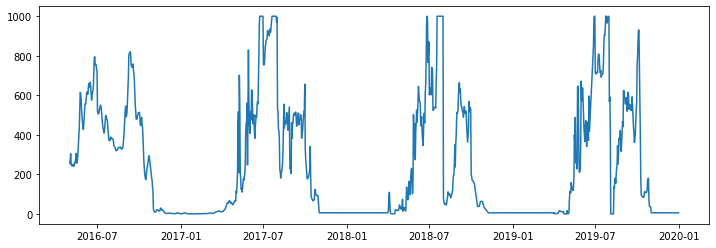

In [105]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
# ts_slice = ts1[ts1['date'] > datetime.strptime('2021-04-01', '%Y-%m-%d')]
ts_slice = ts2
plt.plot(ts_slice['date'], ts_slice['value'])
# plt.plot([1, 2, 3], [1, 1.5, 2])
# plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [ ]:
# нарисуйте пресказания

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

### KTR из orbit (1 балл).



In [ ]:
from orbit.models.ktrlite import KTRLiteMAP

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

### Phophet (1 балл).



In [ ]:
from prophet import Prophet

# ваш код обучения моделей здесь

In [ ]:
# посчитайте метрики на test

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [ ]:
# нарисуйте пресказания

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [ ]:
# обучите классические модели ML

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания